# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [169]:
# Scrapping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
# Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [171]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [172]:
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [173]:
# Extract all rows of data
table = soup.find("table", {"class": "table"})
table_rows= table.find_all("tr")
print(len(table_rows))

1868


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [174]:
# Create an empty list
rows=[]

# Loop through the scraped data to create a list of rows
for tr in table_rows:
    td = tr.find_all('td') 
    row = [cell.text.strip() for cell in td if cell.text.strip()]  
    #We will only append the row if it contains data
    if row:  
        rows.append(row)



In [175]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns = ["id","terrestrial_date","sol","ls","month","min_temp","pressure"])

In [176]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [177]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [178]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df = df.astype({
         'sol':int,
         'ls':int,
         'month':int,
         'min_temp':float,
          'pressure':float         
               
})


In [179]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [180]:
# 1. How many months are there on Mars?
months= df['month'].nunique()
months

12

In [181]:
# 2. How many sols (Martian days) worth of data are there?
sols=df['sol'].count()
sols

1867

In [182]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature (°C)')

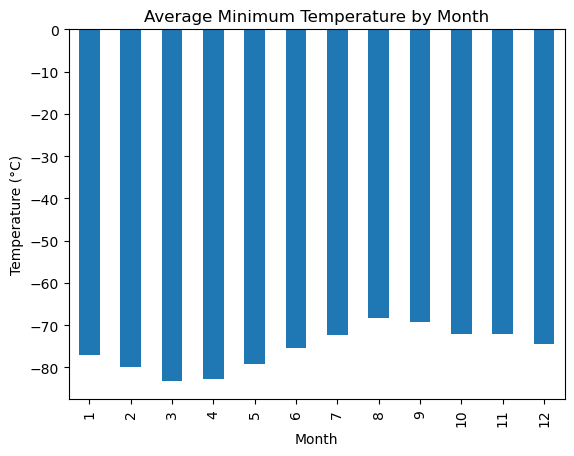

In [183]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')


In [184]:
#sorthing the avg_min_temp series to get the coldest and hottest months
avg_temp_sorted=avg_min_temp.sort_values()
avg_temp_sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature (°C)')

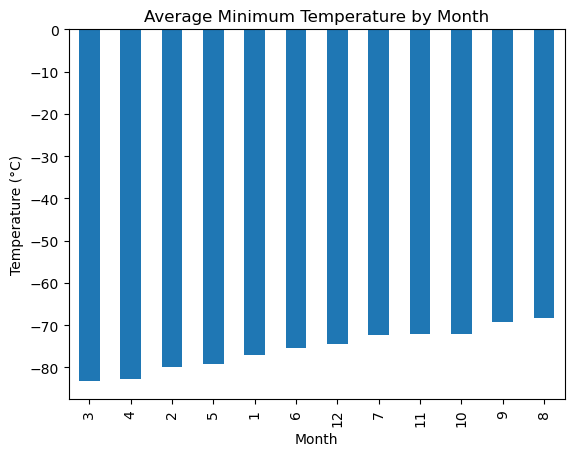

In [185]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_temp_sorted.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

In [186]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

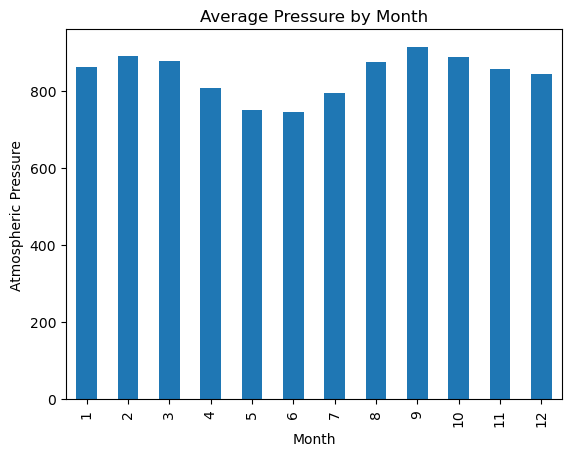

In [187]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

Text(0, 0.5, 'Atmospheric Pressure')

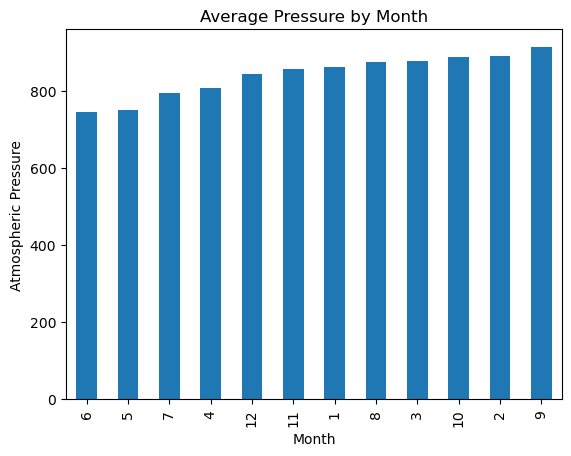

In [188]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_press_sorted = avg_pressure.sort_values()
avg_press_sorted.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

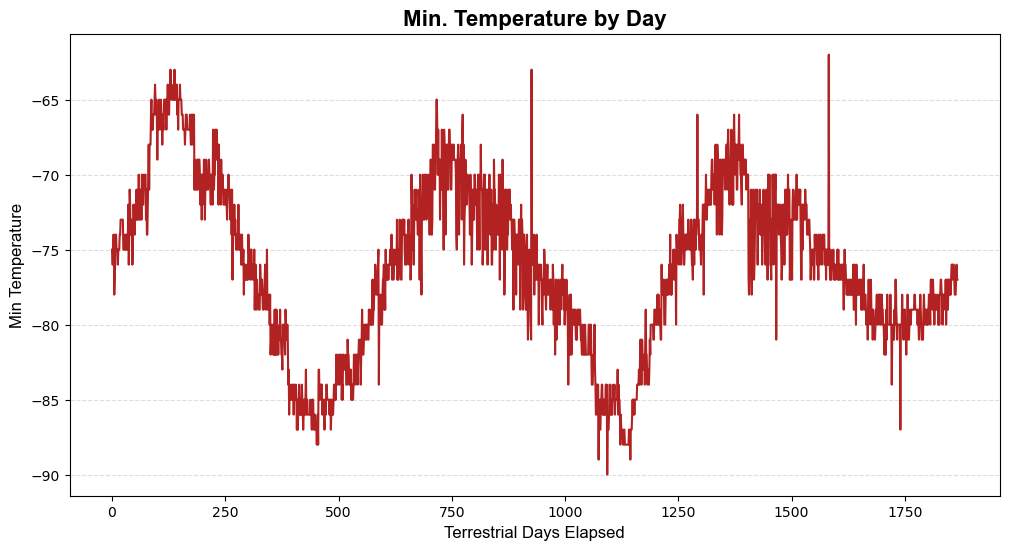

In [197]:

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df.index, df.min_temp, color="firebrick")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Terrestrial Days Elapsed", fontfamily="Arial", fontsize=12)
plt.ylabel("Min Temperature", fontfamily="Arial", fontsize=12)
plt.title("Min. Temperature by Day", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

#### Minimum Temperature

From the data visualization and the sorted dataframe of temperature we can infer that March is the coldest month and August is the hottest month on Mars.

#### Atmospheric Pressure

We can conclude looking at the bar garph that during  June  atmospheric pressure is the lowest whereas in September it is the highest.

#### Year Length

There are 670 days in a martian year according to the calculation made with the data available

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [194]:
# Write the data to a CSV
df.to_csv('martian_data.csv', index=True)

In [195]:
browser.quit()